<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style("whitegrid")
#sns.set_context("poster")


In [2]:
df = pd.read_csv('data/search.csv', encoding='utf8')
#df.head() 

In [3]:
#df.describe()

In [4]:
#df.info()

In [5]:
subset = df[['First Search Time (GMT)','All Department (APS) or Category', 'Keywords', 'Is From External Link (Y/N)','Search From External Site (Y/N)','Paid Purchase (Y/N)','Number of Clicked Items', 'Number of Items Added to Cart', 'Number of Items Ordered']]
subset.columns = ['time','category','keyword','ext_link','ext_search','purchase','clicks', 'card_added','card_ordered']
subset.describe().round()

,ext_link,ext_search,purchase,clicks,card_added,card_ordered
count,425.0,425.0,425.0,425.0,425.0,425.0
mean,0.0,0.0,0.0,2.0,0.0,0.0
std,0.0,0.0,0.0,2.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,0.0,0.0,2.0,0.0,0.0
max,1.0,1.0,1.0,18.0,2.0,2.0


In [7]:
print (type(subset.time[0]))
subset.loc[:,'time'] = pd.to_datetime(subset.time)
print (subset.time[0:3,])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
0   2017-01-04 22:12:00
1   2018-01-07 20:21:26
2   2016-03-08 21:50:46
Name: time, dtype: datetime64[ns]


In [9]:
subset.loc[:,'year'] = subset['time'].dt.year.values.astype(int)
subset.loc[:,'month'] = subset['time'].dt.month.values.astype(int)
subset.loc[:,'day'] = subset['time'].dt.day.values.astype(int)
subset.loc[:,'hour'] = subset['time'].dt.hour.values.astype(int)
subset.loc[:,'day_name'] = subset['time'].dt.day_name() 
#subset.head(3)

In [10]:
print(subset.time.min())
print(subset.time.max())

2016-02-22 22:05:19
2019-01-11 07:02:55


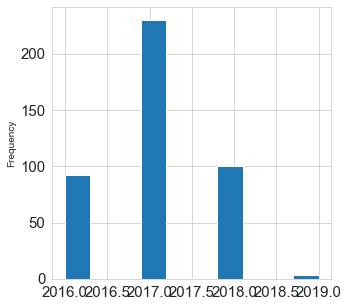

In [11]:
subset.year.plot(kind='hist',fontsize = 15, figsize=(5,5));

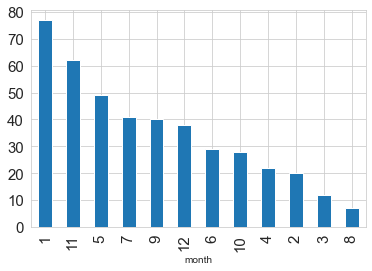

In [12]:
month_hist = subset.groupby('month').size()
month_hist = month_hist.sort_values(ascending=False)
month_hist.plot.bar(fontsize = 15)

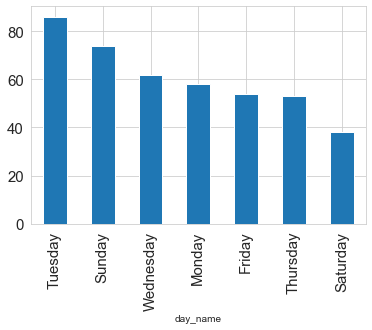

In [13]:
day_hist = subset.groupby('day_name').size()
day_hist = day_hist.sort_values(ascending=False)
day_hist.plot.bar(fontsize = 15)

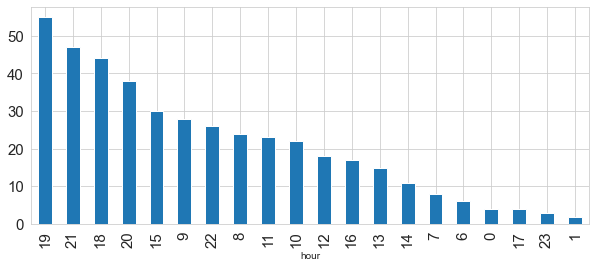

In [14]:
hour_hist = subset.groupby('hour').size()
hour_hist = hour_hist.sort_values(ascending=False)
hour_hist.plot.bar(fontsize = 15, figsize=(10,4))

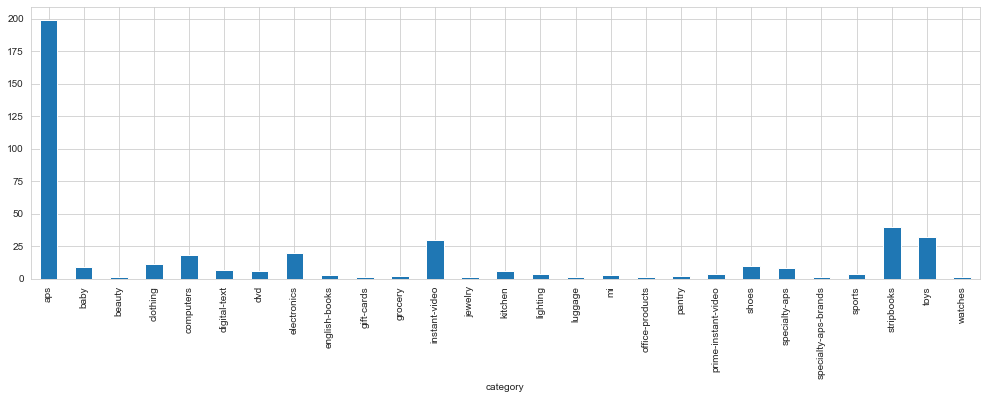

In [15]:
category=subset.groupby(['category']).size()
category.plot(kind='bar',figsize=(17,5));
#categories are bascically user choices from the search dopdown on amazon.com 
#aps stands for 'look in all categories'

In [16]:
subset_clicked = subset[(subset['clicks']>1)]
print (len(subset_clicked))
subset_clicked.mean()

141


ext_link           0.035461
ext_search         0.092199
purchase           0.106383
clicks             4.000000
card_added         0.184397
card_ordered       0.120567
year            2017.092199
month              6.553191
day               16.787234
hour              16.007092
dtype: float64

In [17]:
subset_clicked = subset_clicked.sort_values('card_ordered', ascending=False)
subset_clicked.reset_index(drop=True, inplace=True)
#subset_clicked

In [18]:
cols = ['category','keyword','purchase','clicks','card_added','card_ordered']
#print(subset_clicked.loc[:,cols].head(30))


In [19]:
clicks=subset_clicked.groupby(['category']).sum()

clicks = clicks.loc[:,['clicks','card_added','card_ordered']].sort_values('clicks', ascending=False)
clicks.reset_index(inplace=True)
clicks = clicks.loc[1:,:]
clicks [0:40]

,category,clicks,card_added,card_ordered
1,toys,53,0,0
2,computers,40,0,0
3,instant-video,37,3,1
4,clothing,28,4,2
5,stripbooks,27,0,0
6,electronics,25,2,2
7,shoes,14,1,1
8,digital-text,10,0,0
9,specialty-aps,7,0,0
10,kitchen,7,2,1


[Text(0, 0, 'toys'),
 Text(0, 0, 'computers'),
 Text(0, 0, 'instant-video'),
 Text(0, 0, 'clothing'),
 Text(0, 0, 'stripbooks'),
 Text(0, 0, 'electronics'),
 Text(0, 0, 'shoes'),
 Text(0, 0, 'digital-text'),
 Text(0, 0, 'specialty-aps'),
 Text(0, 0, 'kitchen'),
 Text(0, 0, 'lighting'),
 Text(0, 0, 'dvd'),
 Text(0, 0, 'mi'),
 Text(0, 0, 'grocery'),
 Text(0, 0, 'baby'),
 Text(0, 0, 'prime-instant-video'),
 Text(0, 0, 'sports')]

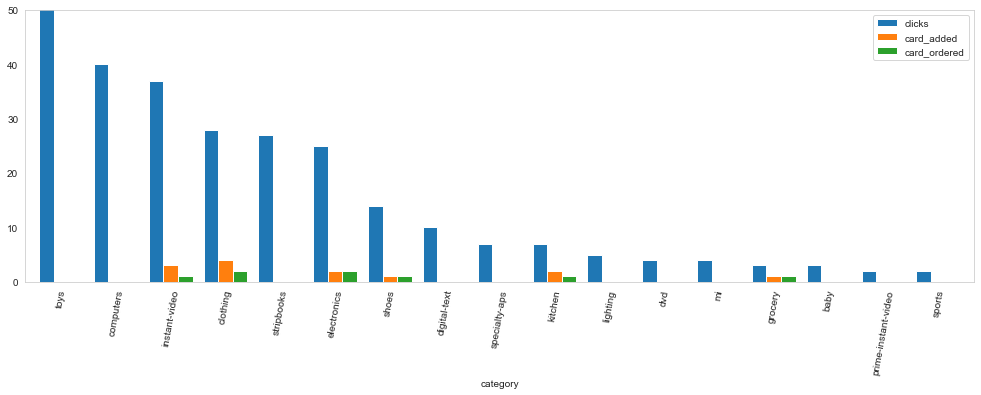

In [20]:
ax = clicks.plot('category',['clicks','card_added','card_ordered'],\
                   grid=False, kind='bar',ylim =[0,50], width=0.8, figsize=(17,5))
ax.set_xticklabels(clicks['category'], rotation=80)

In [21]:
spearmancorr = clicks.corr(method ='spearman') #non-parametric since no normal distribution 
spearmancorr

,clicks,card_added,card_ordered
clicks,1.000000,0.326855,0.287283
card_added,0.326855,1.000000,0.977128
card_ordered,0.287283,0.977128,1.000000


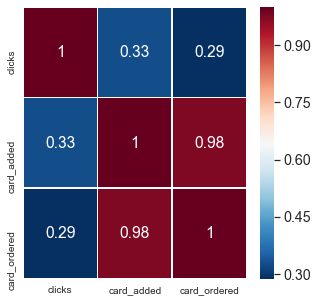

In [22]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.set(font_scale=1.3)

sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5
           )